In [1]:
#Set the notebook display method
# inline = embedded plots, notebook = interactive plots
%matplotlib inline

#Import Statements- "matplotlib" is used for backend plotting in Jupyter notebooks
from plantcv import plantcv as pcv
import matplotlib 
import matplotlib.pyplot as plt
import argparse
import imutils
import numpy as np 
import cv2

In [2]:
#Set figure size for the notebook
matplotlib.rcParams["figure.figsize"]= (8,8)

In [3]:
#Set up code that will help this script to eventually run in Parallel

#The options class mimics the workflow command-line argument parser 
#that is used for workflow parallelization. Using it while developing 
#a workflow in Jupyter makes it easier to convert the workflow to a script later.
class options:
    def __init__(self):        
        self.image = "./test_1C.JPG" #put the images in the same location as the jupyter notebook
        self.debug = "plot" #Set self.debug to "plot" so that image outputs for each step is shown
        self.writeimg = False
        self.result = "berry_results"
        self.outdir = "."
        
#get options
args = options()

#set debug to the global parameter
pcv.params.debug = args.debug

#increase text size in plots
pcv.params.text_size = 50
pcv.params.text_thickness = 100

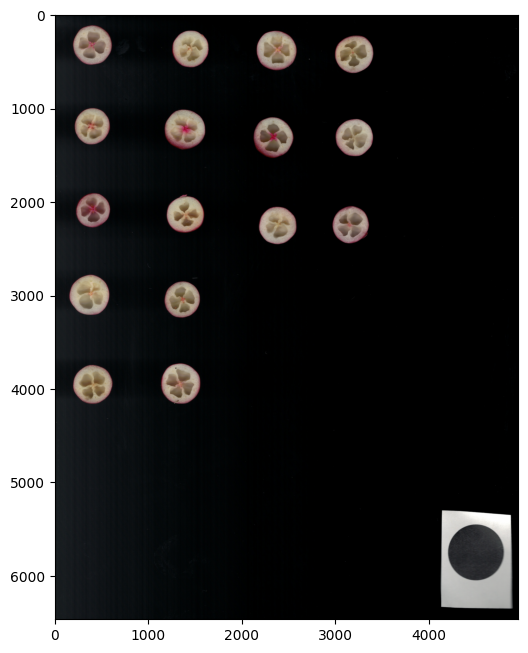

In [63]:
#Read the image
img1, path, filename = pcv.readimage(filename=args.image)

In [64]:
#now use template matching to find the scale marker

#template matching algorithms require greyscale images (2d matrix rather than a 3d matrix of an RGB image)
#Import the image to be analyzed as a greyscale (add the ", 0" to make it greyscale)
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
H,W = img.shape

#Import the template (object of interest we want to find in our image)
#template matching algorithms require that the template be imported as a greyscale image (add the ", 0" to make it greyscale)
template = cv2.imread('Scale.jpg', 0)
h,w = template.shape

#match our template to our image using one of 6 different methods for template matching
#template matching essentially just takes the template and moves it along the image (convolution) until it finds a region 
#of pixels in the greyscale image that appear to be a good match
#Test a bunch of different template matching algorithms that are available in openCV (these are the 6 main ones)
#methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
#After testing on multiple images, the cv2.TM_CCOEFF seems like the most robust algorithm.
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)

#W = width of image, w = width of template
#H = height of image, h = height of template
#+1 = 1 position of movement
#The following line defined how the template gets dragged across the larger image to find a good region of pixels 
#that it matches to. Essentially defines the number of positions we can slide the template across the image in the 
#'x' direction and the 'y' direction. This also defines the size of our output array. The output array tells us what areas 
#of our image most closely match our template.
(W - w + 1, H - h + 1)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#For any algorithm other than cv2.TM_SQDIFF or cv2.TM_SQDIFF_NORMED, we want to use the "max_loc" value
#to define the position of our object. Keep in mind these x, y coordinates are stored as a tuple and will
#need to be converted to an integer to use in further functions later in the script.
location = max_loc

#convert tuple to integer and print the x, y coordinates of the object of interest
x = int(location[0])
print(x)
y = int(location[1])
print(y)

4165
5416


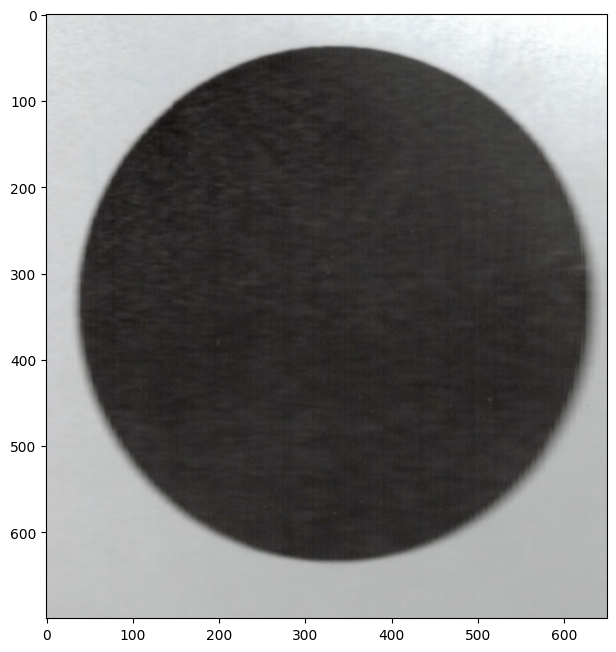

In [73]:
crop_img = img1[y:y+700, x:x+650]
plt.imshow(crop_img)
plt.show()

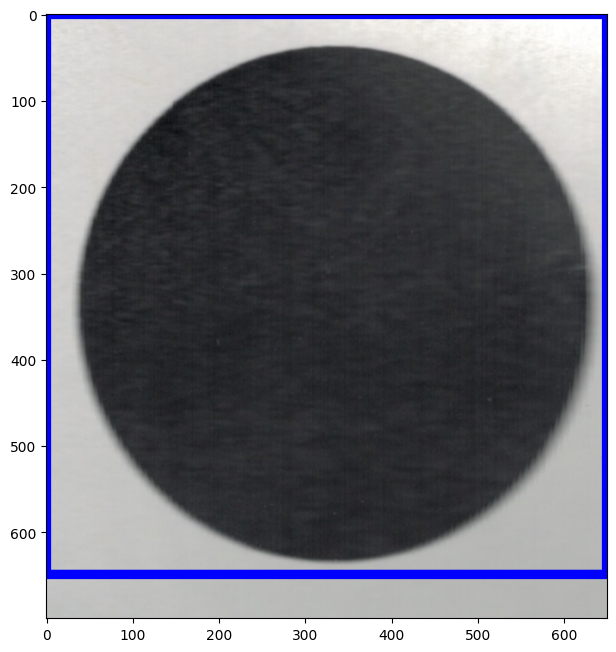

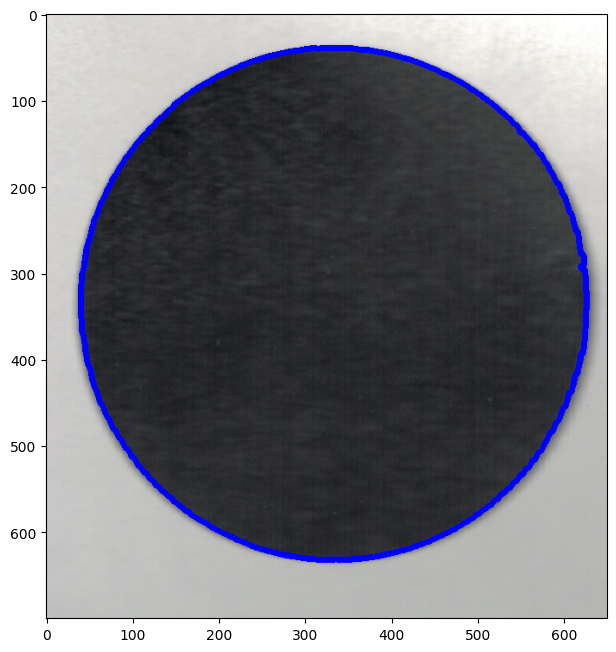

273711.0


In [77]:
# First make a region of interest around the scale (coin or spot of known size). 
# Then use `report_size_marker_area`
# pretend a berry is the scale marker
pcv.params.line_thickness = 10
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=crop_img, x=0, y=0, h=650, w=650)

# Detect and Measure Size Marker
image = pcv.report_size_marker_area(img=crop_img, roi_contour=roi_contour, roi_hierarchy=roi_hierarchy, 
                    marker='detect', objcolor='dark', thresh_channel='v', thresh=80, label="default")

# Access data stored out from report_size_marker_area
marker_area = pcv.outputs.observations['default']['marker_area']['value']
print(marker_area)

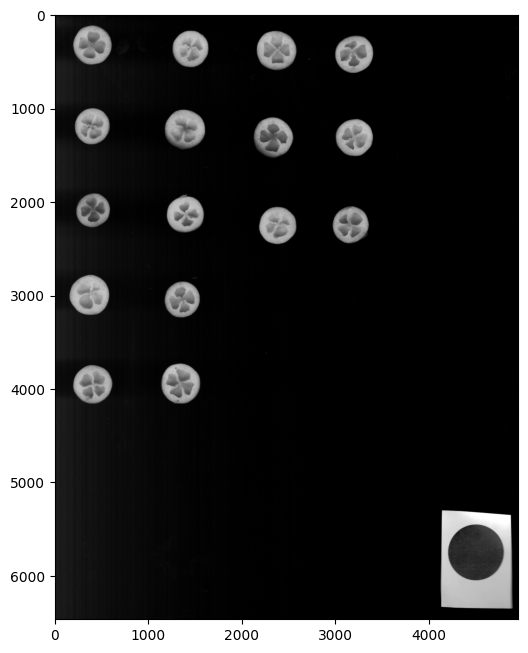

In [7]:
#lets look closer at thresholding based on "s" from HSV colorspace
l = pcv.rgb2gray_lab(rgb_img=img1, channel="l")

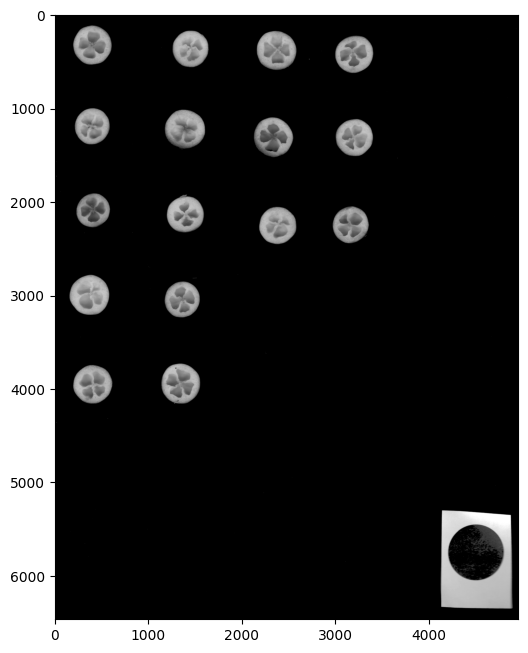

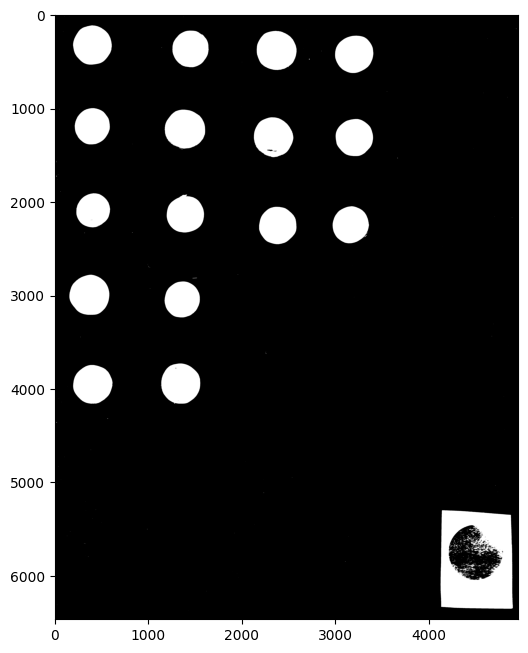

In [81]:
#now threshold on the "l" channel
masked1, masked = pcv.threshold.custom_range(img=l, lower_thresh=[50], upper_thresh=[255])

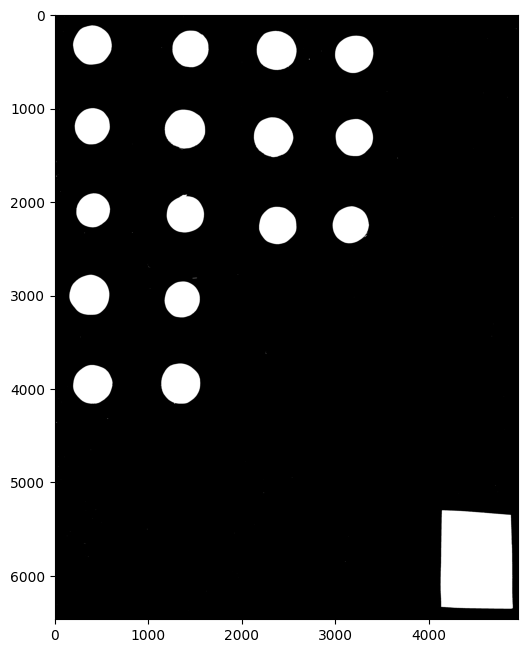

In [82]:
# Apply fill holes to a binary image 
fill_objects = pcv.fill_holes(bin_img=masked1)

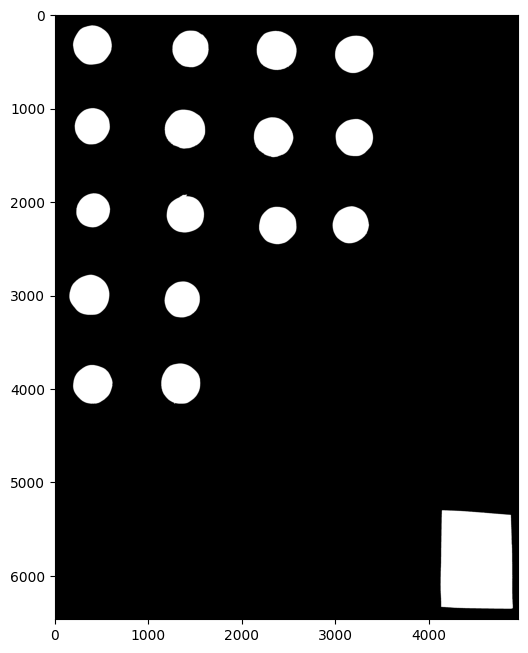

In [83]:
# Fill in small objects (speckles)
# Inputs:
#    bin_img  = binary image. img will be returned after filling
#    size     = minimum object area size in pixels (integer)
Whole_berry = pcv.fill(bin_img=fill_objects, size=30000)

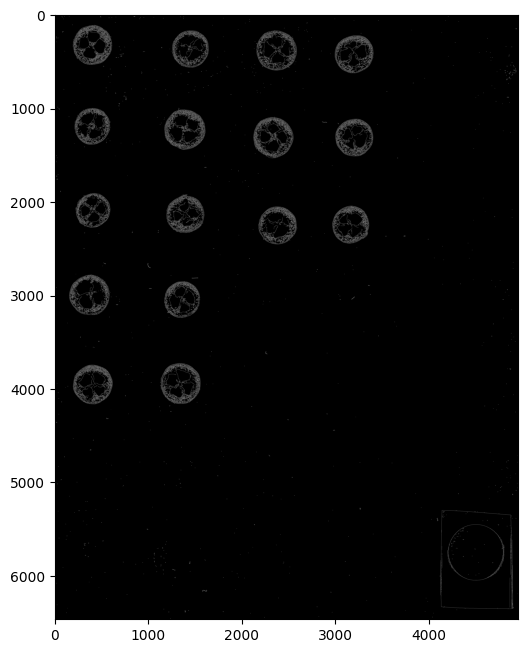

In [84]:
# Lower sigma value to pick up more edges
edges = pcv.canny_edge_detect(img=img1, sigma=0.1)

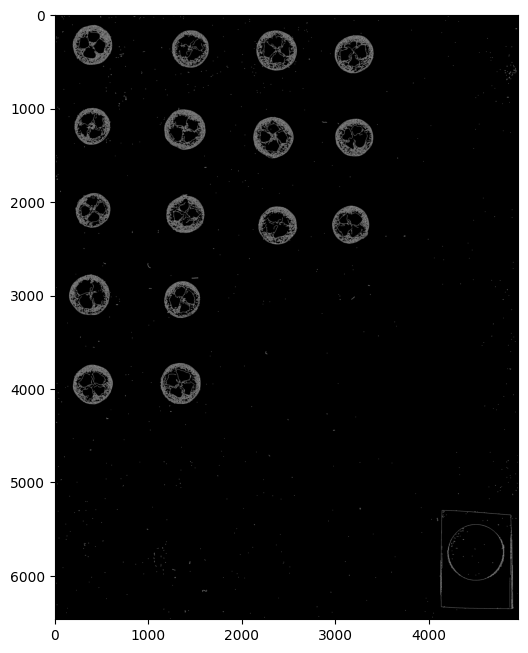

In [85]:
# Lower sigma value to pick up more edges
edges2 = pcv.canny_edge_detect(img=edges, sigma=0.1)

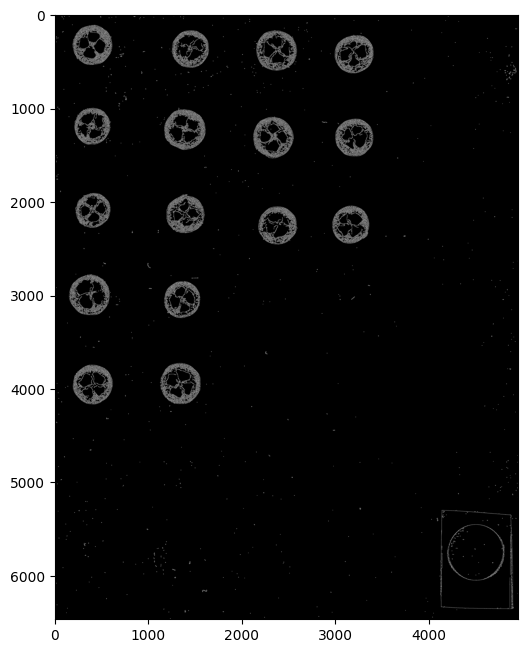

In [86]:
# Lower sigma value to pick up more edges
edges3 = pcv.canny_edge_detect(img=edges2, sigma=0.1)

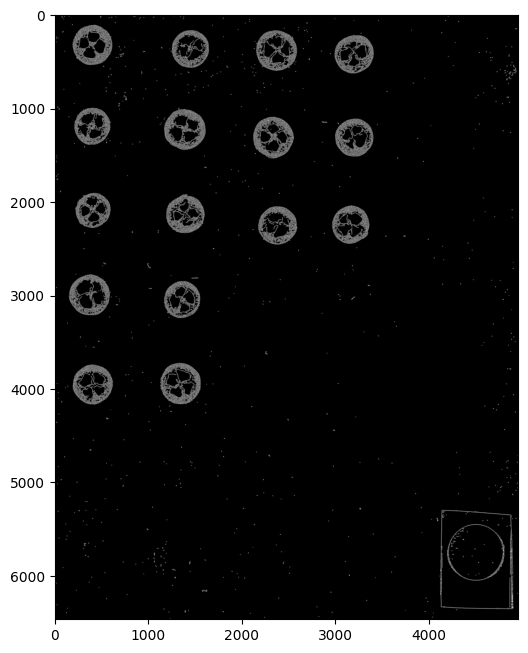

In [87]:
# Lower sigma value to pick up more edges
edges4 = pcv.canny_edge_detect(img=edges3, sigma=0.1)

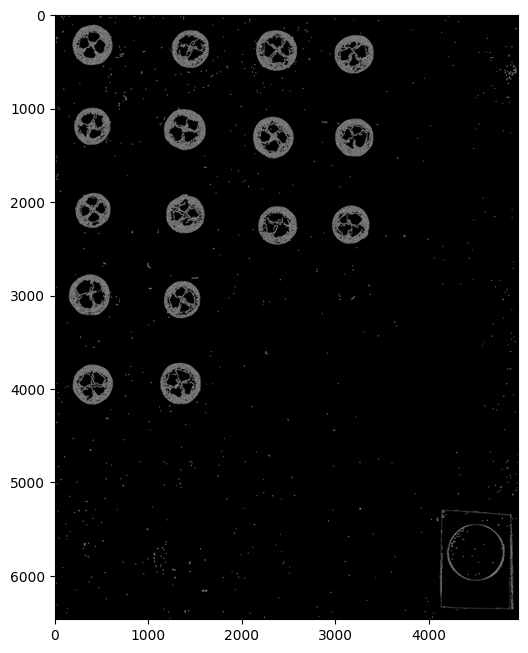

In [88]:
# Lower sigma value to pick up more edges
edges5 = pcv.canny_edge_detect(img=edges4, sigma=0.1)

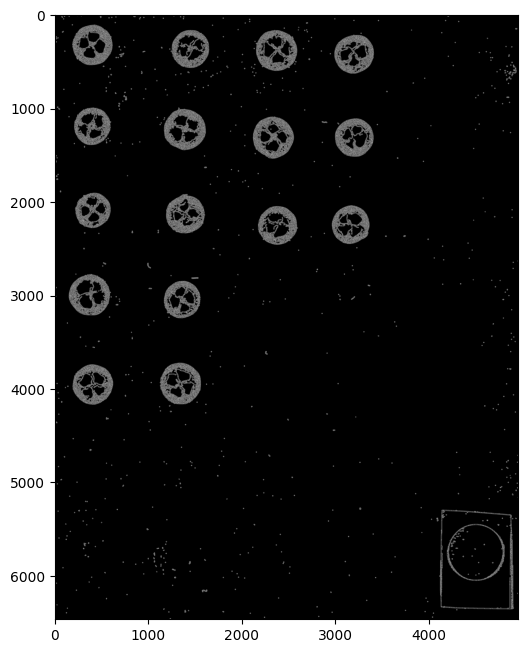

In [89]:
# Lower sigma value to pick up more edges
edges6 = pcv.canny_edge_detect(img=edges5, sigma=0.1)

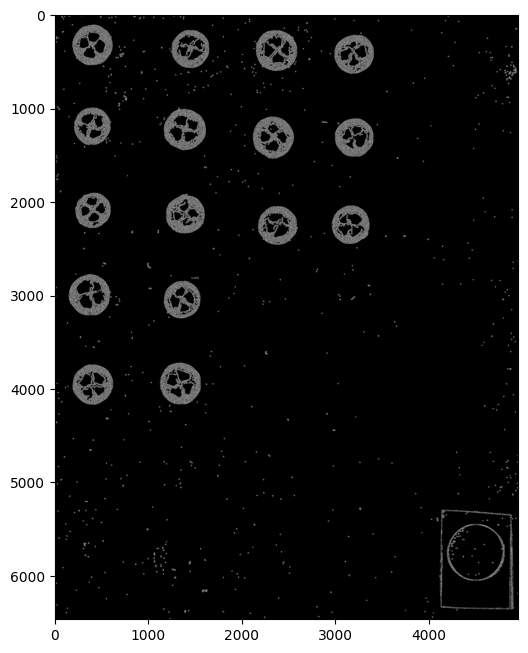

In [90]:
# Lower sigma value to pick up more edges
edges7 = pcv.canny_edge_detect(img=edges6, sigma=0.1)

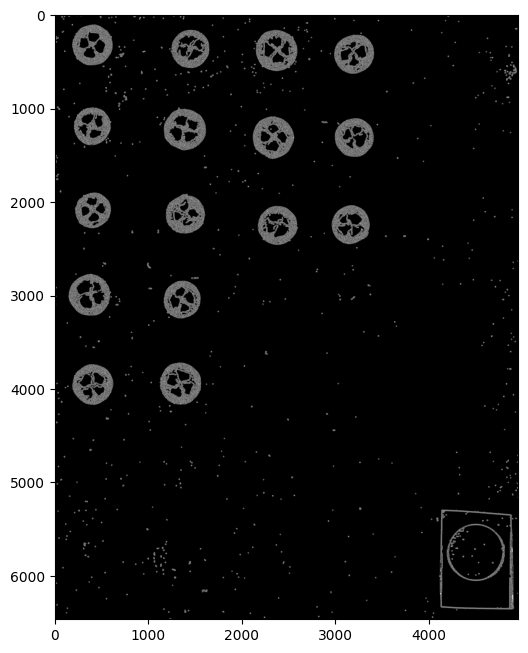

In [91]:
# Lower sigma value to pick up more edges
edges8 = pcv.canny_edge_detect(img=edges7, sigma=0.1)

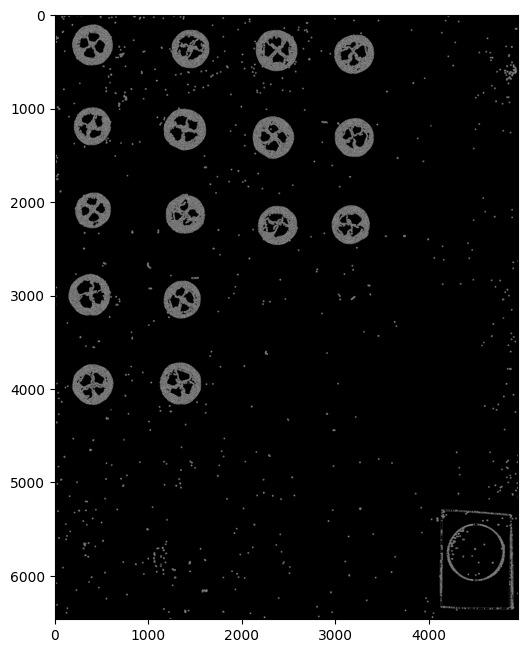

In [92]:
# Lower sigma value to pick up more edges
edges9 = pcv.canny_edge_detect(img=edges8, sigma=0.1)

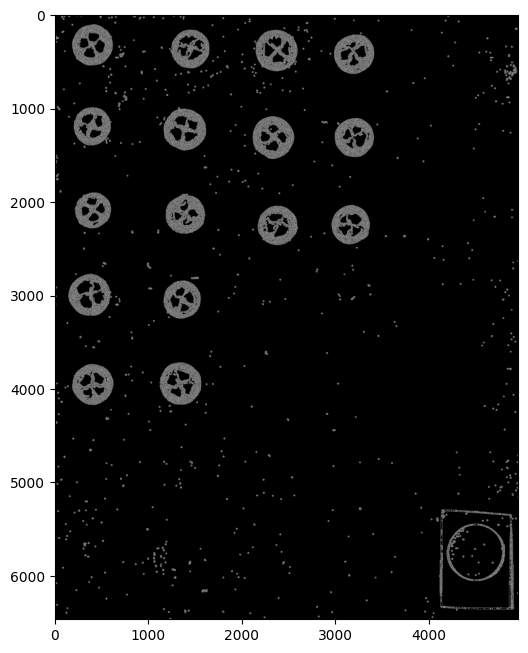

In [93]:
# Lower sigma value to pick up more edges
edges10 = pcv.canny_edge_detect(img=edges9, sigma=0.1)

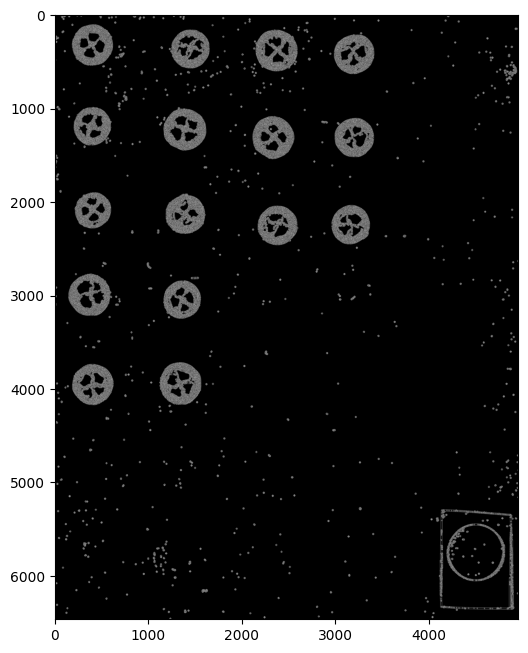

In [94]:
# Lower sigma value to pick up more edges
edges11 = pcv.canny_edge_detect(img=edges10, sigma=0.1)

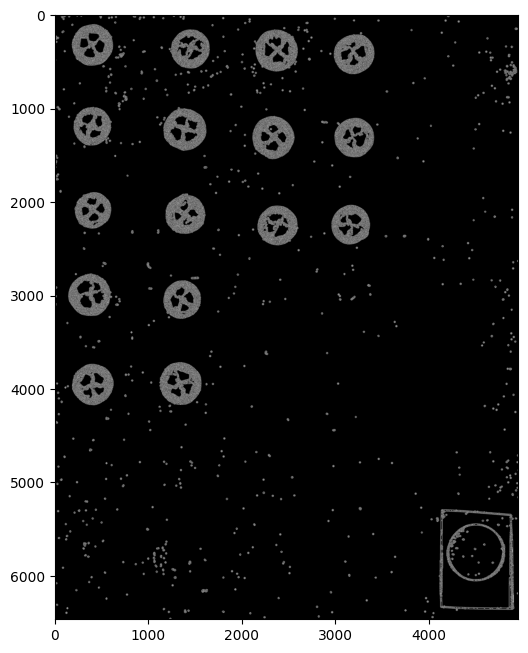

In [95]:
# Lower sigma value to pick up more edges
edges12 = pcv.canny_edge_detect(img=edges11, sigma=0.1)

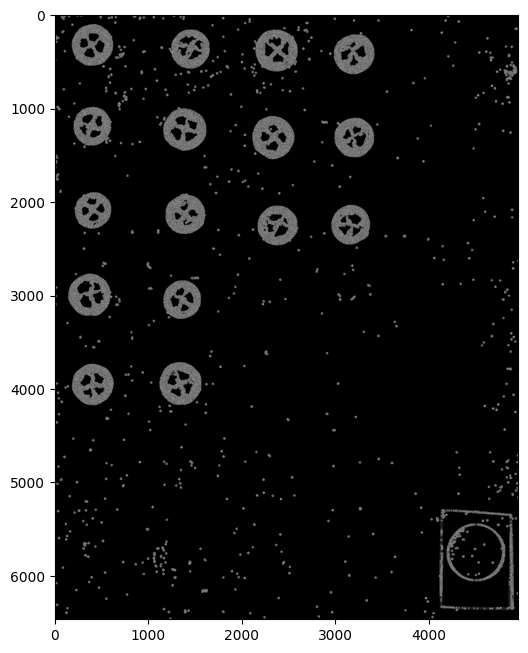

In [96]:
# Lower sigma value to pick up more edges
edges13 = pcv.canny_edge_detect(img=edges12, sigma=0.1)

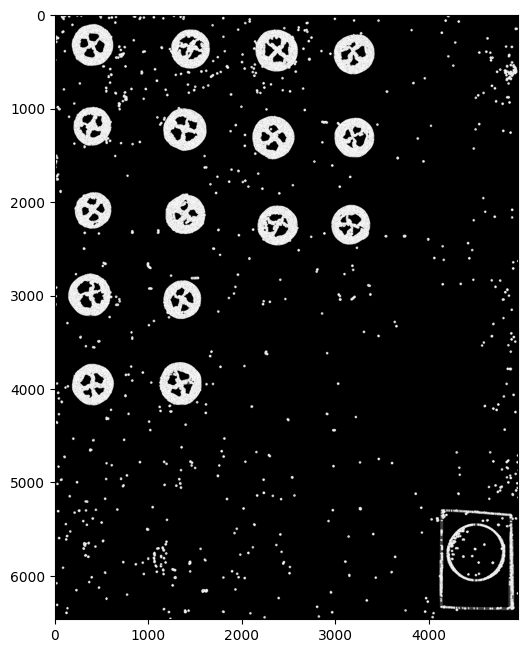

In [97]:
dilate_img1 = pcv.dilate(gray_img=edges13, ksize=2, i=1)

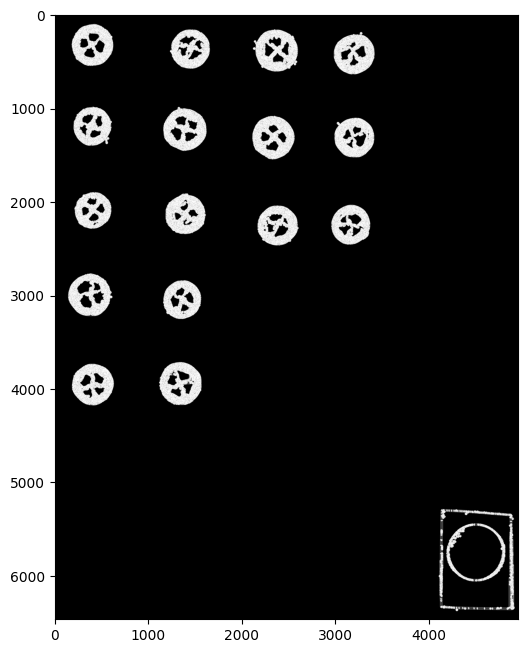

In [98]:
# Fill in small objects (speckles)
# Inputs:
#    bin_img  = binary image. img will be returned after filling
#    size     = minimum object area size in pixels (integer)
fill_image1 = pcv.fill(bin_img=dilate_img1, size=30000)

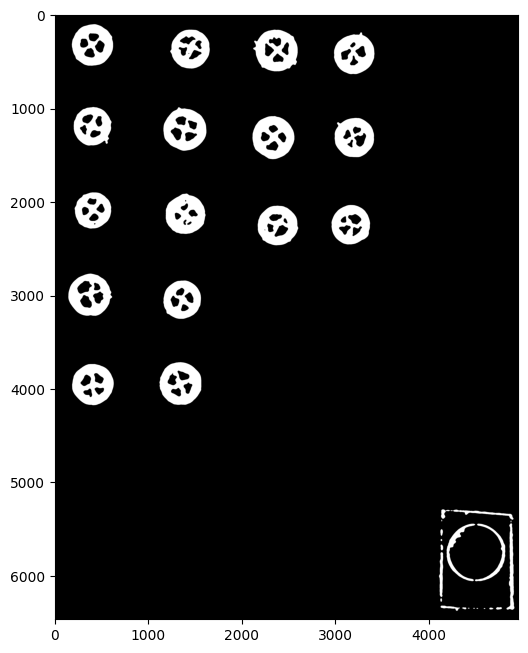

In [99]:
binary_img = pcv.median_blur(gray_img=fill_image1, ksize=25)

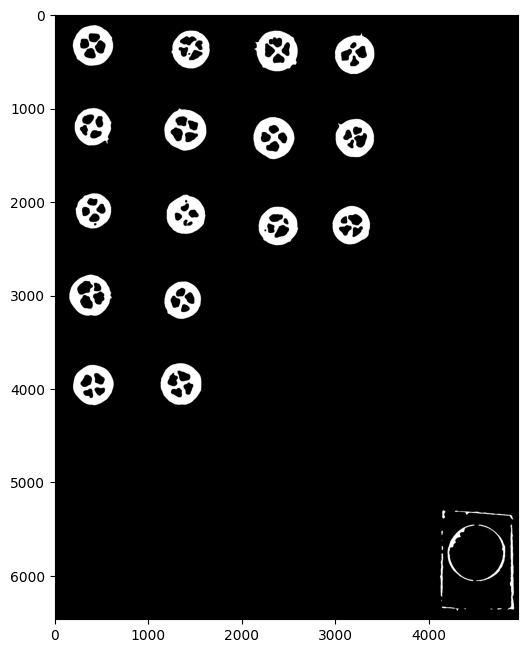

In [100]:
# Perform erosion filtering
# Results in removal of isolated pixels or boundary of object removal
Locules = pcv.erode(gray_img=binary_img, ksize=2, i=10)

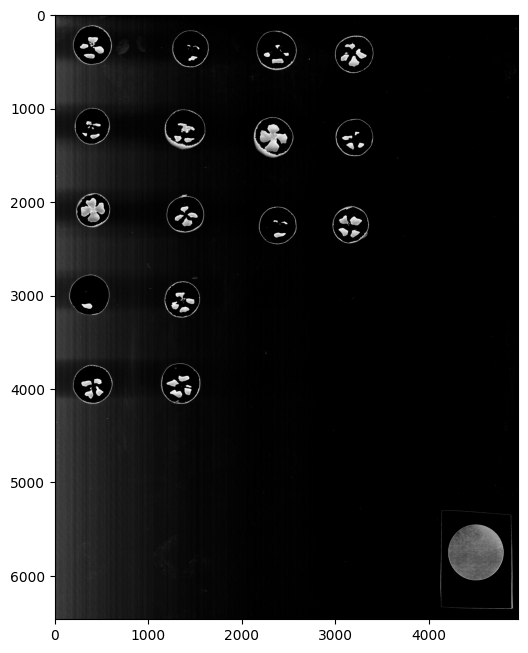

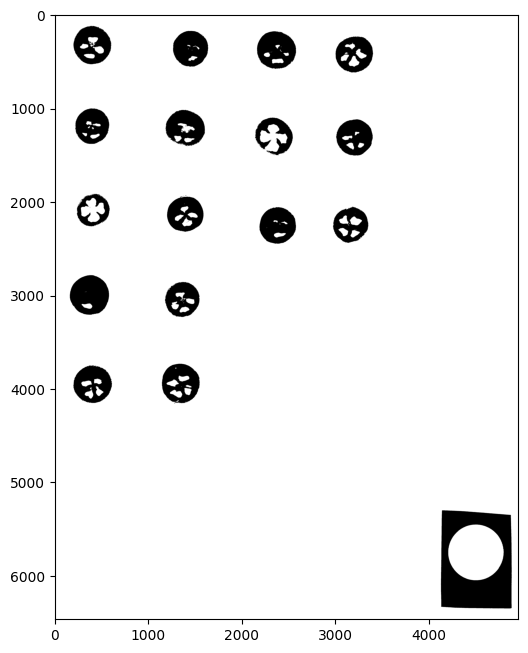

In [101]:
#now threshold on the "l" channel
masked_Loc, masked = pcv.threshold.custom_range(img=l, lower_thresh=[0], upper_thresh=[115])

In [102]:
Final_Masked = cv2.subtract(Locules, masked_Loc)

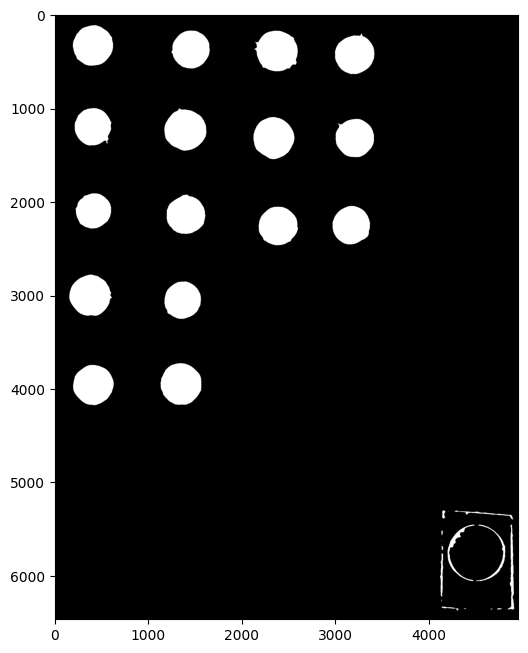

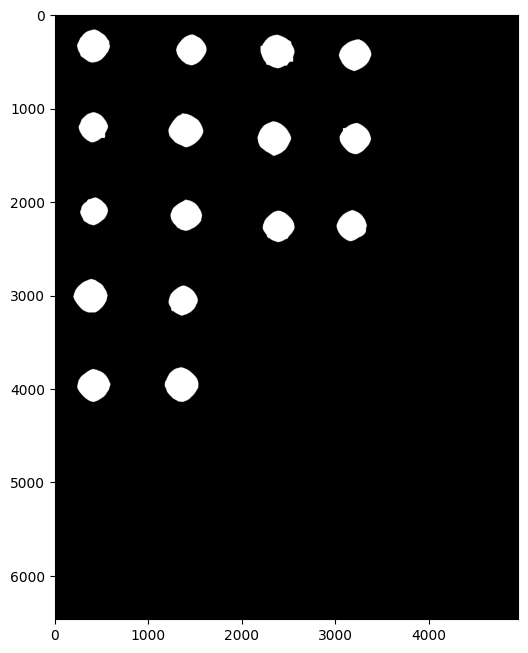

In [103]:
# Apply fill holes to a binary image 
Locules2 = pcv.fill_holes(bin_img=Locules)
Locules2 = pcv.erode(gray_img=Locules2, ksize=8, i=10)

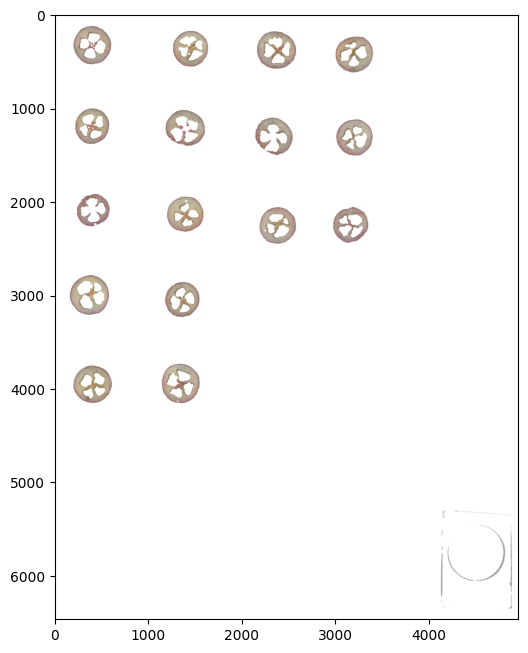

In [104]:
# Apply mask to the original image to see what we capture as the "total_cross_section"
Masked_Locules = pcv.apply_mask(img=img1, mask=Final_Masked, mask_color='white')

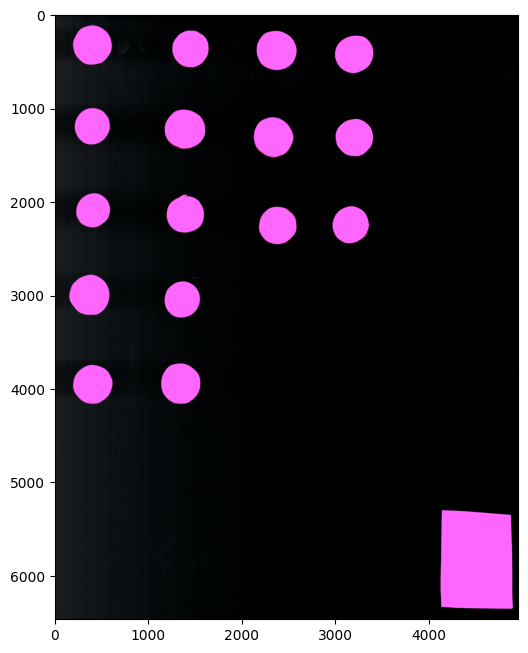

In [105]:
# Find objects (contours: black-white boundaries)

# Inputs:
#    img  = image that the objects will be overlayed
#    mask = what is used for object detection
id_objects, obj_hierarchy = pcv.find_objects(img=img1, mask=Whole_berry)

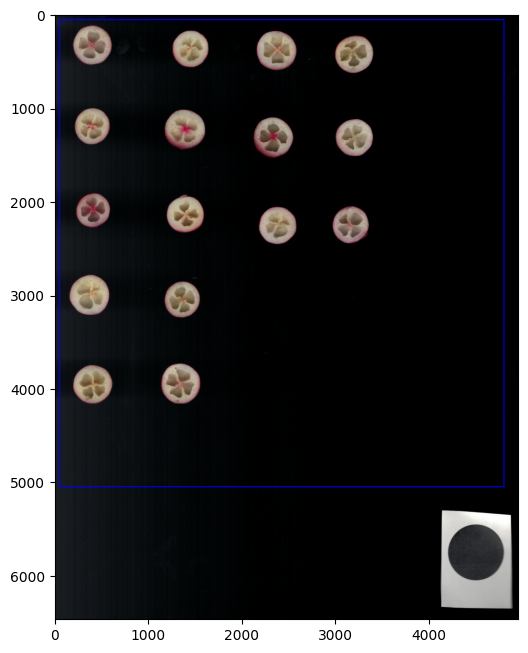

In [106]:
# Define region of interest (ROI)
pcv.params.debug = "plot"
# Inputs:
#    img   = An RGB or grayscale image to plot the ROI on.
#    x     = The x-coordinate of the upper left corner of the rectangle.
#    y     = The y-coordinate of the upper left corner of the rectangle.
#    h     = The width of the rectangle.
#    w     = The height of the rectangle.
#   roi_contour, roi_hierarchy = pcv.roi.rectangle(5, 90, 200, 390, img1) 
#                                                  |______________|
#                                            adjust these four values
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=img1, x=50, y=50, h=5000, w=4750)

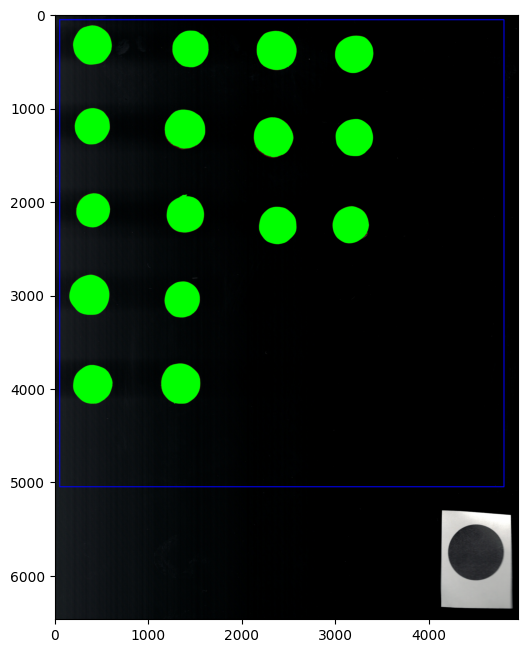

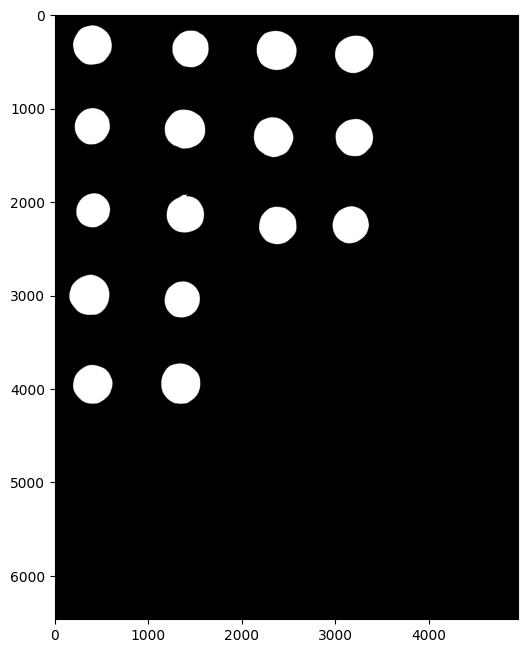

In [107]:
# Keep objects that overlap with the ROI

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)

roi_berries, roi_obj_berries, kept_mask, obj_area = pcv.roi_objects(img=img1, roi_contour=roi_contour, 
                                                                      roi_hierarchy=roi_hierarchy,
                                                                      object_contour=id_objects, 
                                                                      obj_hierarchy=obj_hierarchy, 
                                                                      roi_type='partial')

In [108]:
# Find number of cranberries

# Inputs:
#    contours = list of contours
number_berries = len(roi_berries)

pcv.outputs.add_observation(sample='default', variable='number_berries', trait='number of berries detected in the image',
                            method='count', scale='count', datatype=float,
                            value=number_berries, label='count')

pcv.outputs.observations['default']['number_berries']['value']

16

In [109]:
#now we need to organize the berries in the image and assign them ID numbers
#so we can reference what data goes to what berry in an image. Unforuntately, 
#there is no simply function in plantcv/opencv for this so we nee to have some code
#that will first organzie all of the objects in the image into rows, then subsequently
#sort the objects within each row from left to right based on position.
#We can accomplish this by first applying a long horizontal kernel to close objects adjacent
#to one another into a single row. Then we get the contours of the rows and their bounding boxes
#Then we save the row boxes and sort on Y. We then loop over each sorted row box and 
#extract the row from the thresholded image. We get the contours of each objects in the 
#row and save the the bounding boxes of the object and sort the contours for a given row on X.
pcv.params.debug = None

# read input image
img = cv2.imread(args.image)

# apply long thing kernal and morphology close to form rows from objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2000,1))
morph = cv2.morphologyEx(kept_mask, cv2.MORPH_CLOSE, kernel)

# find contours and bounding boxes of rows
rows_img = img.copy()
boxes_img = img.copy()
rowboxes = []
rowcontours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rowcontours = rowcontours[0] if len(rowcontours) == 2 else rowcontours[1]
index = 1
for rowcntr in rowcontours:
    xr,yr,wr,hr = cv2.boundingRect(rowcntr)
    cv2.rectangle(rows_img, (xr, yr), (xr+wr, yr+hr), (0, 255, 255), 20)
    rowboxes.append((xr,yr,wr,hr))

# sort rowboxes on y coordinate
def takeSecond(elem):
    return elem[1]
rowboxes.sort(key=takeSecond)
    
# loop over each row    
for rowbox in rowboxes:
    # crop the image for a given row
    xr = rowbox[0]
    yr = rowbox[1]
    wr = rowbox[2]
    hr = rowbox[3]  
    row = Whole_berry[yr:yr+hr, xr:xr+wr]
    bboxes = []
    # find contours of each object in the row
    contours = cv2.findContours(row, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        bboxes.append((x+xr,y+yr,w,h))
    # sort bboxes on x coordinate
    def takeFirst(elem):
        return elem[0]
    bboxes.sort(key=takeFirst)
    # draw sorted boxes
    for box in bboxes:
        xb = box[0]
        yb = box[1]
        wb = box[2]
        hb = box[3]
        cv2.rectangle(boxes_img, (xb, yb), (xb+wb, yb+hb), (0, 255, 255), 20)
        cv2.putText(boxes_img, str(index), (xb,yb), cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=5, color=(0,255,255), thickness=20)
        roi_contour, roi_hierarchy = pcv.roi.rectangle(img=img1, x=xb, y=yb, h=hb, w=wb)
        roi_objects, roi_obj_hierarchy, kept_mask2, obj_area = pcv.roi_objects(img=img1, roi_contour=roi_contour, 
                                                                      roi_hierarchy=roi_hierarchy,
                                                                      object_contour=roi_berries, 
                                                                      obj_hierarchy=roi_obj_berries, 
                                                                      roi_type='partial')
        berry, berry_mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=roi_obj_hierarchy)
        img = pcv.analyze_object(img=img, obj=berry, mask=berry_mask, label=f"berry_{str(index)}")
        cv2.putText(img, str(index), (xb,yb), cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=5, color=(0,255,255), thickness=20)
        index = index + 1

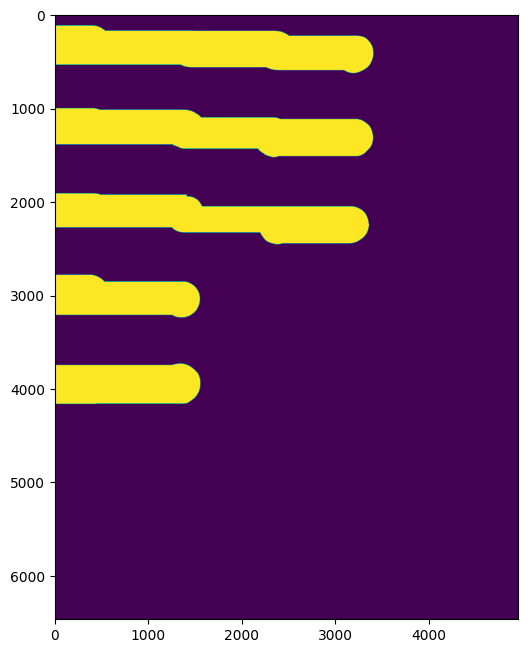

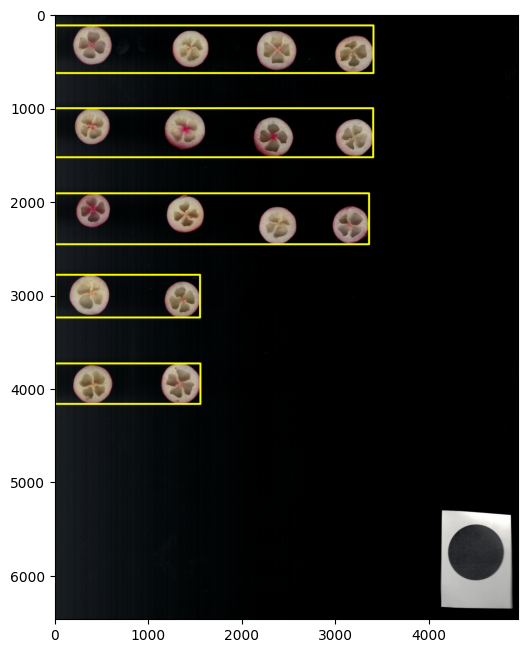

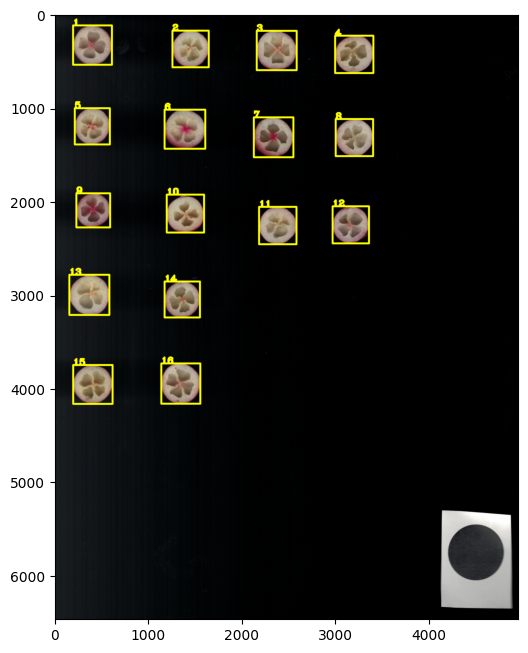

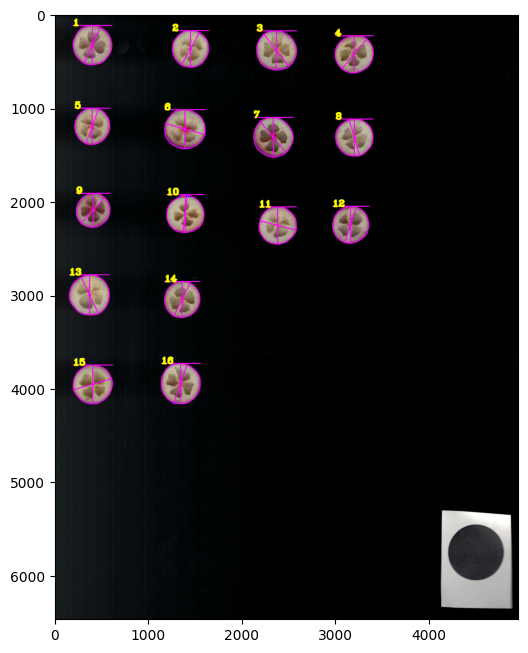

In [110]:
# show images of how objects were sorted from top left to bottom right
plt.imshow(morph)
plt.show()
plt.imshow(cv2.cvtColor(rows_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(boxes_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#Lets print off the images showing what was measured and the ID numbers of each object
#pcv.params.debug = "plot"
#pcv.plot_image(img=img)

In [111]:
# During analysis, measurements are stored in the background in the outputs recorder.

#This example includes image analysis for 'area', 'convex_hull_area', 'solidity', 
#'perimeter', 'width', 'height', 'longest_path', 'center_of_mass, 'convex_hull_vertices', 
#'object_in_frame', 'ellipse_center', 'ellipse_major_axis', 'ellipse_minor_axis', 'ellipse_angle', 
#'ellipse_eccentricity' using anayze_object and color analysis using analyze_color.

# Write custom data to results file
pcv.outputs.save_results(filename=args.result + "_WholeBerry.json")

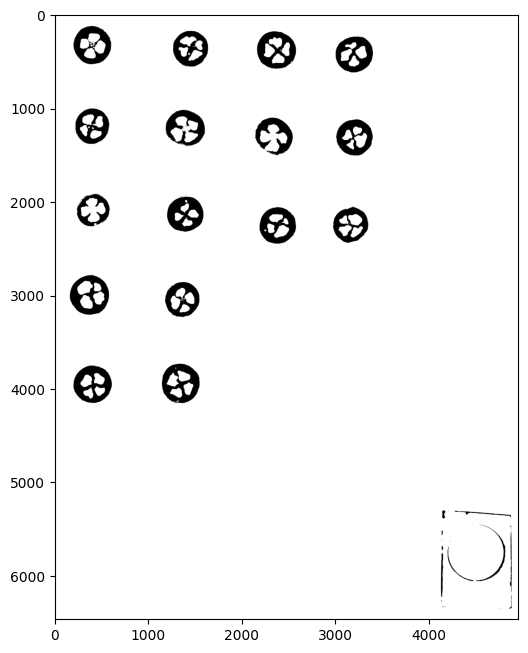

In [112]:
pcv.params.debug = "plot"
#Now lets measure the internal structure of the berries
# Invert a binary mask.
inverted_img = pcv.invert(Final_Masked)

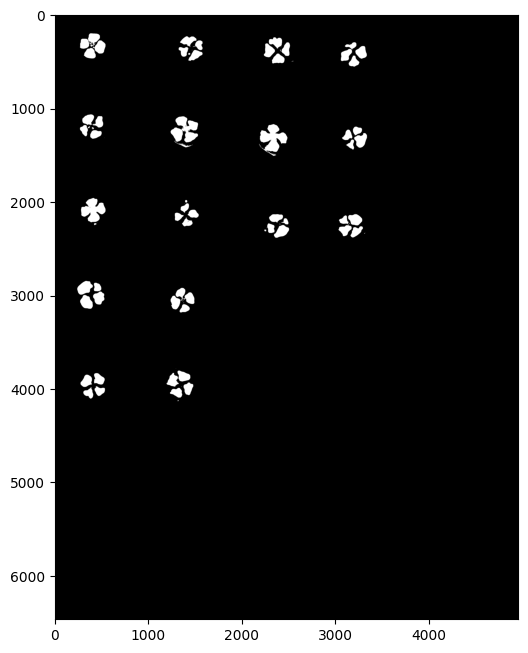

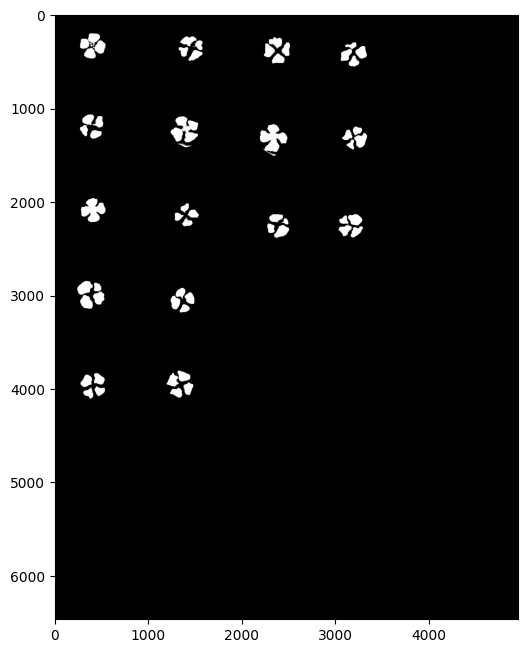

In [113]:
#Mask the image so all we have left are the internal air pockets of the berries
masked_image = pcv.apply_mask(img=inverted_img, mask=Locules2, mask_color='black')
masked_image2 = pcv.fill(bin_img=masked_image, size=1000)

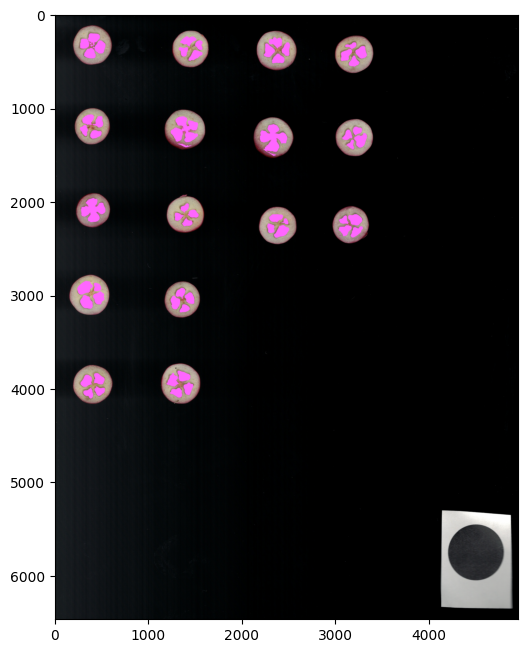

In [114]:
# Find objects (contours: black-white boundaries)

# Inputs:
#    img  = image that the objects will be overlayed
#    mask = what is used for object detection
Loc_objects, Loc_hierarchy = pcv.find_objects(img=img1, mask=masked_image2)

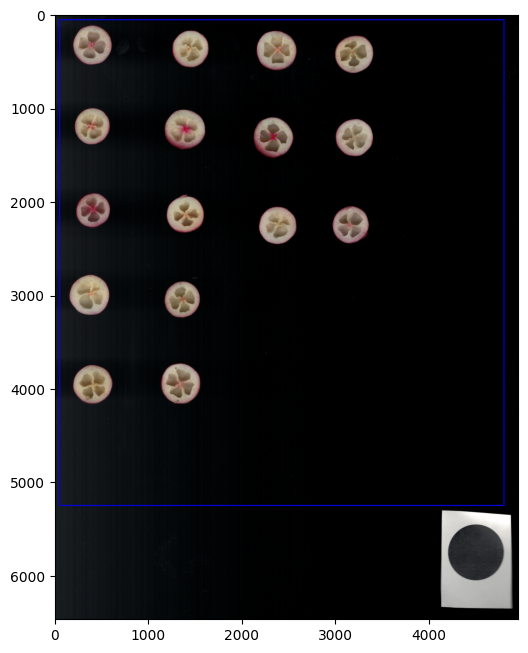

In [115]:
roi_contour2, roi_hierarchy2 = pcv.roi.rectangle(img=img1, x=50, y=50, h=5200, w=4750)

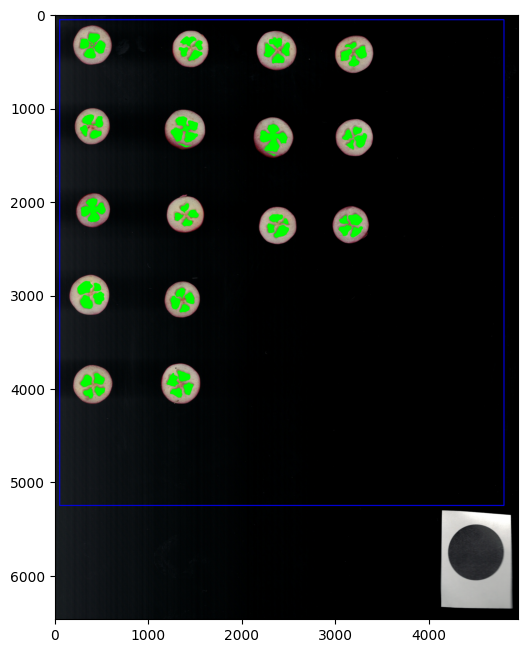

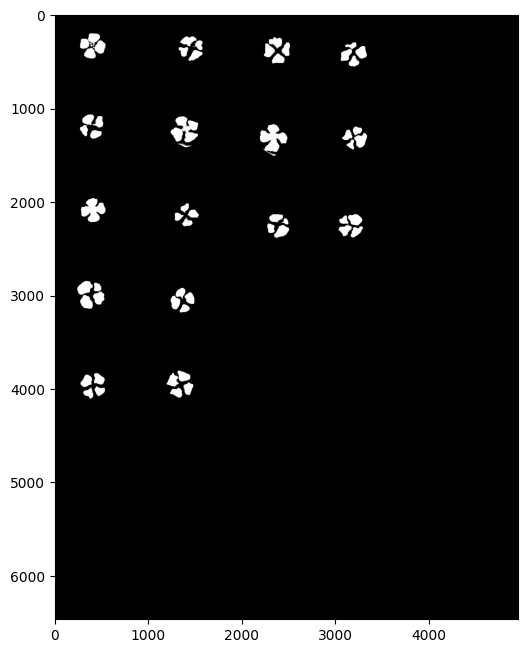

In [116]:
# Keep objects that overlap with the ROI

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)

roi_Locules, roi_obj_locules, kept_mask2, obj_area = pcv.roi_objects(img=img1, roi_contour=roi_contour2, 
                                                                      roi_hierarchy=roi_hierarchy2,
                                                                      object_contour=Loc_objects, 
                                                                      obj_hierarchy=Loc_hierarchy, 
                                                                      roi_type='partial')

In [117]:
#We need to find a way to "cluster" the multiple contours (air pockets) that represent a single berry
#There are methods we can use to dialate these objects so they touch and we can pick them out as a single object, 
#but then we alter their shape and area. So to identify them as a single object, we will use a strategy called
#"Agglomerative Clustering" which will cluster contours based on their proximity to one another.
#In the following code, we indicate that we want contours within 40 pixels of one another to be treated as a single
#contour that we can then apply our measurements to.

def calculate_contour_distance(contour1, contour2): 
    x1, y1, w1, h1 = cv2.boundingRect(contour1)
    c_x1 = x1 + w1/2
    c_y1 = y1 + h1/2

    x2, y2, w2, h2 = cv2.boundingRect(contour2)
    c_x2 = x2 + w2/2
    c_y2 = y2 + h2/2

    return max(abs(c_x1 - c_x2) - (w1 + w2)/2, abs(c_y1 - c_y2) - (h1 + h2)/2)

In [118]:
def merge_contours(contour1, contour2):
    return np.concatenate((contour1, contour2), axis=0)

In [119]:
def take_biggest_contours(contours, max_number=100):
    sorted_contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    return sorted_contours[:max_number]

In [120]:
def agglomerative_cluster(contours, threshold_distance=90.0):
    current_contours = contours
    while len(current_contours) > 1:
        min_distance = None
        min_coordinate = None

        for x in range(len(current_contours)-1):
            for y in range(x+1, len(current_contours)):
                distance = calculate_contour_distance(current_contours[x], current_contours[y])
                if min_distance is None:
                    min_distance = distance
                    min_coordinate = (x, y)
                elif distance < min_distance:
                    min_distance = distance
                    min_coordinate = (x, y)

        if min_distance < threshold_distance:
            index1, index2 = min_coordinate
            current_contours[index1] = merge_contours(current_contours[index1], current_contours[index2])
            del current_contours[index2]
        else: 
            break

    return current_contours

In [121]:
#now find the raw number of contours within the image
print("contours after findContours: %s" % len(roi_Locules))

contours after findContours: 125


In [122]:
#filter down to only select the 64 largest contours in the image
#this assumes we have 16 berries with 4 contours (locules) per berry = 64 contours total
contours = take_biggest_contours(roi_Locules)
print("contours after take_biggest_contours: %s" % len(contours))

contours after take_biggest_contours: 100


In [123]:
#now apply the agglomerative clustering function to group the remaining contours so any contours within 40 pixels
#of one another are considered a single contour for subsequent analysis 
#(should be 16 contours since there are 16 berries in each image)
Clustered_Locules = agglomerative_cluster(contours)
print("contours after agglomerative_cluster: %s" % len(Clustered_Locules))

contours after agglomerative_cluster: 16


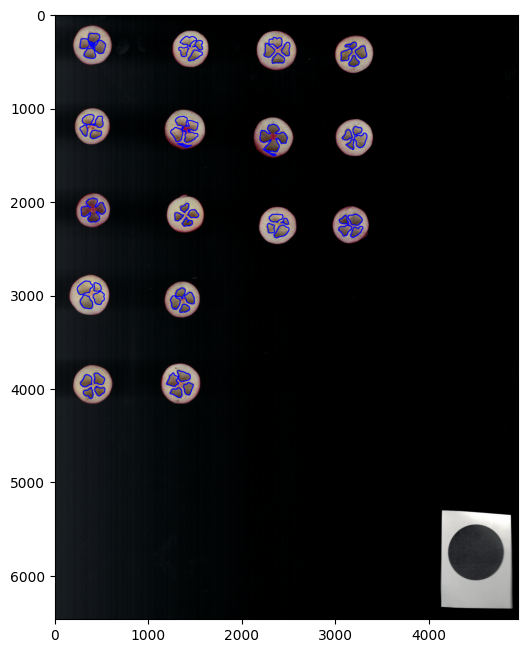

In [124]:
cont_img = img1.copy()
plt.imshow(cv2.cvtColor(cv2.drawContours(cont_img, roi_Locules, -1, (255,0,0), 10), cv2.COLOR_BGR2RGB))
plt.show()

In [125]:
#now we need to organize the berries in the image and assign them ID numbers
#so we can reference what data goes to what berry in an image. Unforuntately, 
#there is no simply function in plantcv/opencv for this so we nee to have some code
#that will first organzie all of the objects in the image into rows, then subsequently
#sort the objects within each row from left to right based on position.
#We can accomplish this by first applying a long horizontal kernel to close objects adjacent
#to one another into a single row. Then we get the contours of the rows and their bounding boxes
#Then we save the row boxes and sort on Y. We then loop over each sorted row box and 
#extract the row from the thresholded image. We get the contours of each objects in the 
#row and save the the bounding boxes of the object and sort the contours for a given row on X.
pcv.params.debug = None

# read input image
img = cv2.imread(args.image)

# apply long thing kernal and morphology close to form rows from objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2000,1))
morph = cv2.morphologyEx(kept_mask, cv2.MORPH_CLOSE, kernel)

# find contours and bounding boxes of rows
rows_img = img.copy()
boxes_img = img.copy()
rowboxes = []
rowcontours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rowcontours = rowcontours[0] if len(rowcontours) == 2 else rowcontours[1]
index = 1
for rowcntr in rowcontours:
    xr,yr,wr,hr = cv2.boundingRect(rowcntr)
    cv2.rectangle(rows_img, (xr, yr), (xr+wr, yr+hr), (0, 255, 255), 20)
    rowboxes.append((xr,yr,wr,hr))

# sort rowboxes on y coordinate
def takeSecond(elem):
    return elem[1]
rowboxes.sort(key=takeSecond)
    
# loop over each row    
for rowbox in rowboxes:
    # crop the image for a given row
    xr = rowbox[0]
    yr = rowbox[1]
    wr = rowbox[2]
    hr = rowbox[3]  
    row = Whole_berry[yr:yr+hr, xr:xr+wr]
    bboxes = []
    # find contours of each object in the row
    contours = cv2.findContours(row, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        bboxes.append((x+xr,y+yr,w,h))
    # sort bboxes on x coordinate
    def takeFirst(elem):
        return elem[0]
    bboxes.sort(key=takeFirst)
    # draw sorted boxes
    for box in bboxes:
        xb = box[0]
        yb = box[1]
        wb = box[2]
        hb = box[3]
        cv2.rectangle(boxes_img, (xb, yb), (xb+wb, yb+hb), (0, 255, 255), 20)
        cv2.putText(boxes_img, str(index), (xb,yb), cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=5, color=(0,255,255), thickness=20)
        roi_contour, roi_hierarchy = pcv.roi.rectangle(img=img1, x=xb, y=yb, h=hb, w=wb)
        roi_objects, roi_obj_hierarchy, kept_mask3, obj_area = pcv.roi_objects(img=img1, roi_contour=roi_contour, 
                                                                      roi_hierarchy=roi_hierarchy,
                                                                      object_contour=Clustered_Locules, 
                                                                      obj_hierarchy=roi_obj_berries, 
                                                                      roi_type='partial')
        locule, locule_mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=roi_obj_hierarchy)
        img = pcv.analyze_object(img=img, obj=locule, mask=locule_mask, label=f"locule_{str(index)}")
        cv2.putText(img, str(index), (xb,yb), cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=5, color=(0,255,255), thickness=20)
        index = index + 1

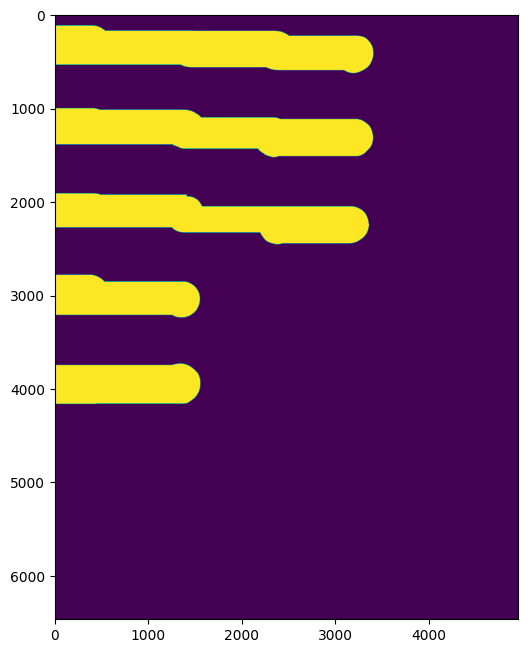

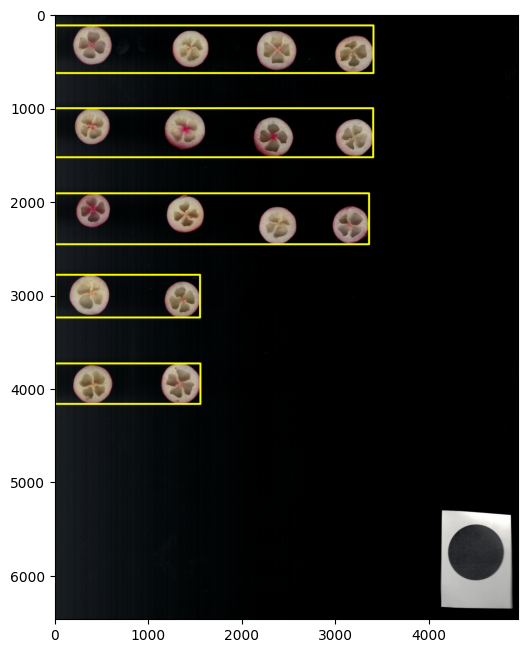

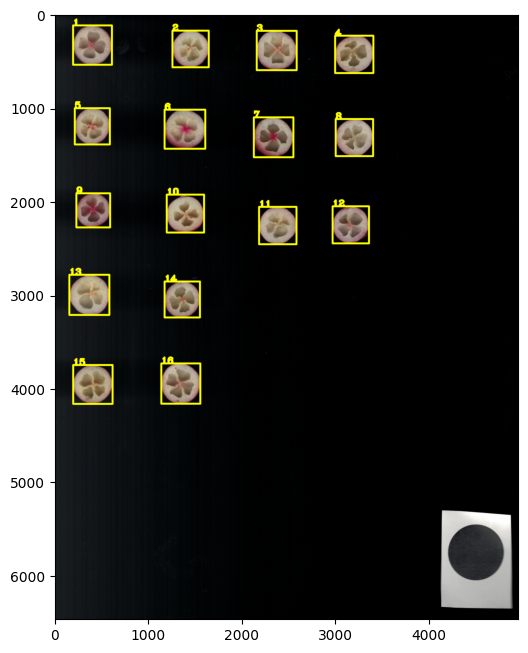

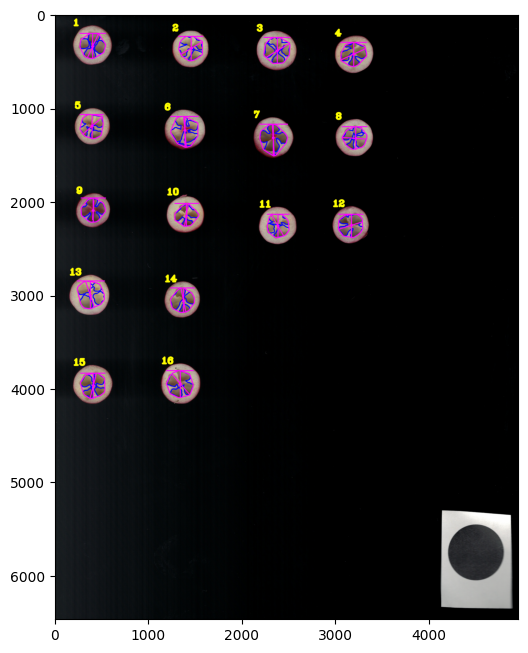

In [126]:
# show images of how objects were sorted from top left to bottom right
plt.imshow(morph)
plt.show()
plt.imshow(cv2.cvtColor(rows_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(boxes_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#Lets print off the images showing what was measured and the ID numbers of each object
#pcv.params.debug = "plot"
#pcv.plot_image(img=img)

In [127]:
# During analysis, measurements are stored in the background in the outputs recorder.

#This example includes image analysis for 'area', 'convex_hull_area', 'solidity', 
#'perimeter', 'width', 'height', 'longest_path', 'center_of_mass, 'convex_hull_vertices', 
#'object_in_frame', 'ellipse_center', 'ellipse_major_axis', 'ellipse_minor_axis', 'ellipse_angle', 
#'ellipse_eccentricity' using anayze_object and color analysis using analyze_color.

# Write custom data to results file
pcv.outputs.save_results(filename=args.result + "_Locules", outformat="json")